In [1]:
from pathlib import Path
from rdkit import Chem
from iotbx.data_manager import DataManager
import numpy as np
import sys
sys.path.append("../PhenixML/")

from phenixml.fragmentation.fragments import MolContainer, Fragment
from phenixml.fragmentation.fragmenters import AngleFragmenter
from phenixml.fragmentation.display import FragmentDisplay

#### Todo
1. read in geostd
2. ANI featurize a lot
3. Try recall

In [2]:
# get molecules
from pathlib import Path
mol_dir = Path("data/GeoParsing/geostd_passed")
#mol_dir = Path("/dev/shm/cschlick/csd_passed/")
mol_files = [file for file in mol_dir.glob("**/*") if file.suffix == ".mol"][:1000]
print("Total MOL2 files:",len(mol_files))

Total MOL2 files: 1000


In [3]:
containers = [MolContainer.from_file_name(file) for file in files]

NameError: name 'files' is not defined

In [4]:
container = containers[0]
fragments = []
for container in containers:
    fragments += AngleFragmenter(exclude_elements=["H"])(container)

NameError: name 'containers' is not defined

In [5]:
from phenixml.featurizers.ani_featurizer import ANIFeaturizer

In [6]:
features = ANIFeaturizer.from_fragments_atom_centric(fragments,return_flat=True)
#features = ANIFeaturizer.from_fragments_midpoint(fragments)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
sel_frags = [fragments[i] for i in inds[0]]

In [10]:
display = FragmentDisplay()

In [18]:
frag0,frag1 = sel_frags[0],fragments[300]

In [19]:
from rdkit.Chem import rdFMCS

In [20]:
mol_list= [frag0.mol_container.rdkit_mol_2d,frag1.mol_container.rdkit_mol_2d]
mcs_SMARTS = rdFMCS.FindMCS(mol_list)
smarts_mol = Chem.MolFromSmarts(mcs_SMARTS.smartsString)
match_list = [x.GetSubstructMatch(smarts_mol) for x in mol_list]

In [33]:
s = """
Steps to measure similarity:

1. Do the two frag selections have even 1 atom MCS 
(does the MCS region of each molecule cover an atom in each frag selection?)

2. Do the two frag selections have two atom overlap?

3. Three atom overlap?

....

4. N atom overlap? (The whole fragments are both within the MCS region.

5. Grow the frag by 1. What percentage now of each frag is in the MCS?

"""

In [30]:
from rdkit.Chem.Draw import MolsToGridImage

def compare_mcs(fragments,subImgSize=(600,600),matchValences=True,**kwargs):
    mol_list= [frag.mol_container.rdkit_mol_2d for frag in fragments]
    mcs_SMARTS = rdFMCS.FindMCS(mol_list,matchValences=matchValences)
    smarts_mol = Chem.MolFromSmarts(mcs_SMARTS.smartsString)
    match_list = [x.GetSubstructMatch(smarts_mol) for x in mol_list]
    return MolsToGridImage(mol_list,
                    highlightAtomLists=[list(match) for match in match_list],
                    highlightBondLists=[],subImgSize=subImgSize,**kwargs)

In [ ]:
mol_list= [frag.mol_container.rdkit_mol_2d for frag in fragments]
mcs_SMARTS = rdFMCS.FindMCS(mol_list,matchValences=matchValences)
smarts_mol = Chem.MolFromSmarts(mcs_SMARTS.smartsString)
match_list = [x.GetSubstructMatch(smarts_mol) for x in mol_list]
return MolsToGridImage(mol_list,
                highlightAtomLists=[list(match) for match in match_list],
                highlightBondLists=[],subImgSize=subImgSize,**kwargs)

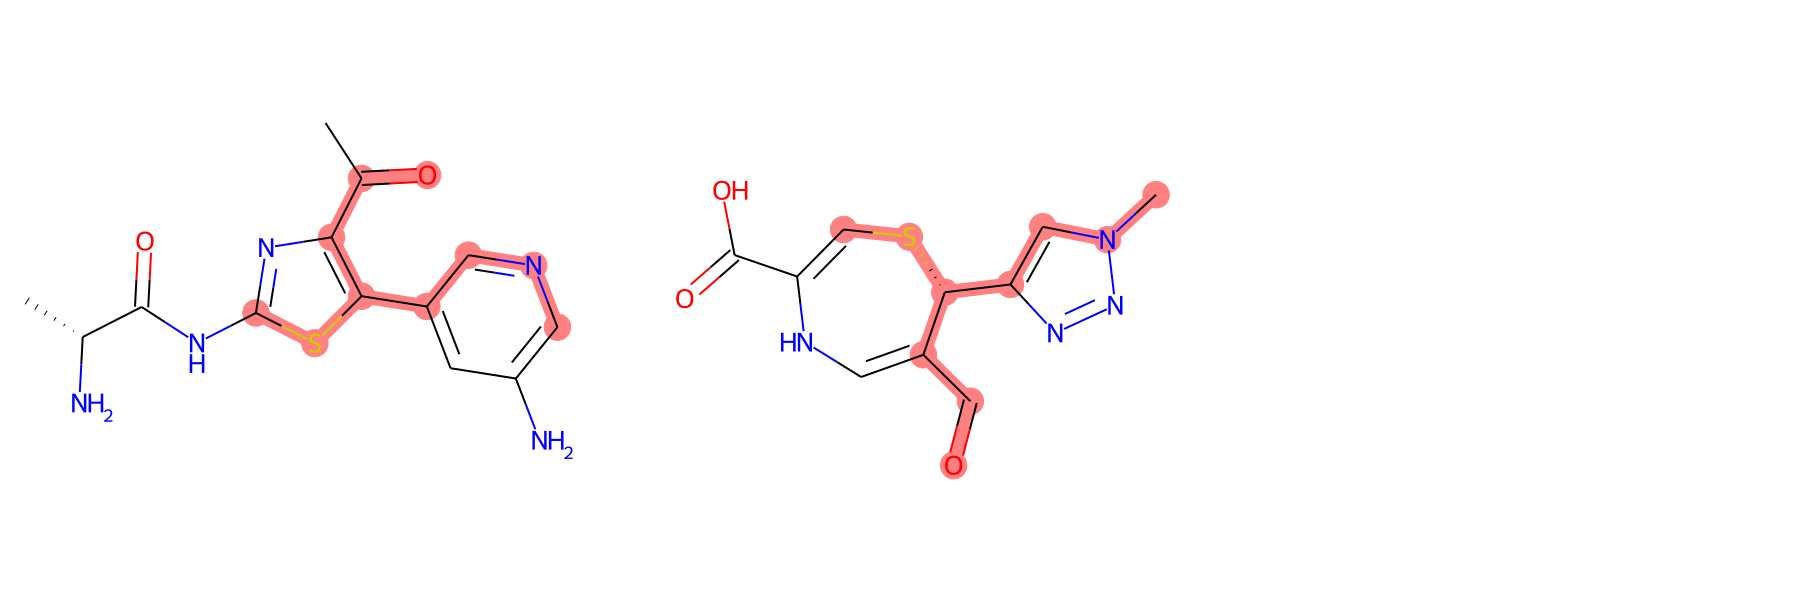

In [31]:
compare_mcs([frag0,frag1],matchValences=True)

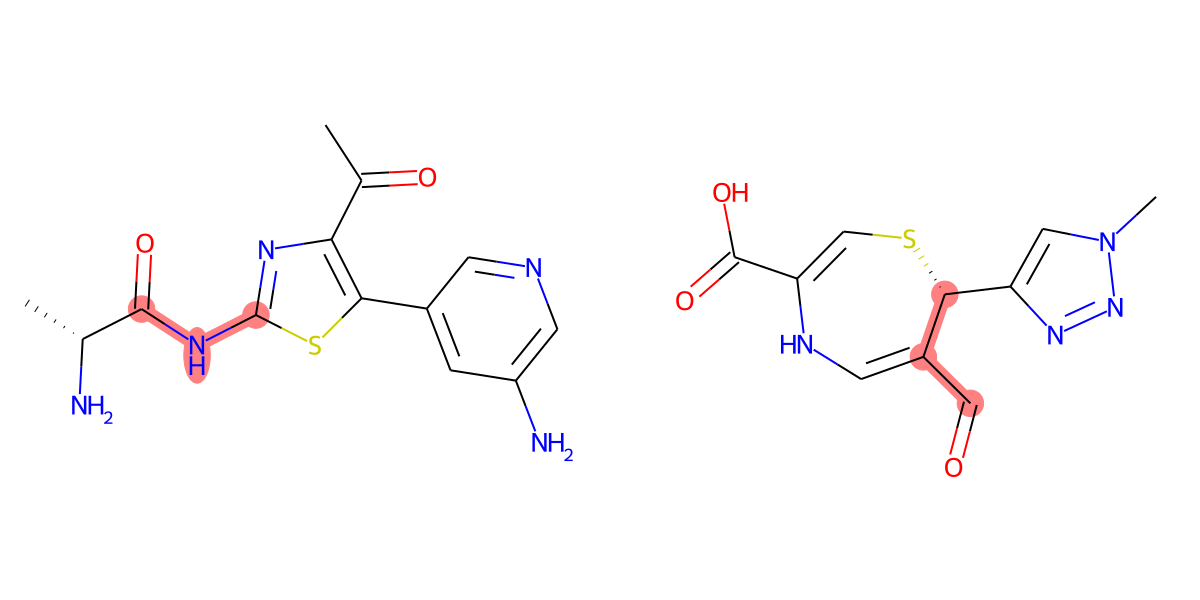

In [28]:
display.grid_fragments([frag0,frag1],molsPerRow=2,subImgSize=(600,600))

In [ ]:
Draw.Mol

In [22]:
frag = fragments[0]
mol = frag.rdkit_mol

In [37]:
root_atom = int(len(frag.atom_selection)/2)
if root_atom >= len(frag.atom_selection):
    root_atom-=1
radius = 6
env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,root_atom)
amap={}
submol=Chem.PathToSubmol(mol,env,atomMap=amap)

In [39]:
submol.GetNumAtoms()

13

In [40]:
mol.GetNumAtoms()

21

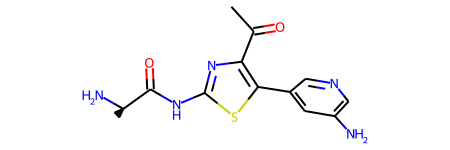

In [29]:
mol